# Udacity Predicting House Prices Example.

This project is done through Excel Spreadsheet in Udacity as an example to prepare me to for the Predictive Business Analys Nanodegree Program.
I wanted to look deepter into it and find the solution using Python. Therefore, I redid it with python and here is my solution. 


There are two csv files. One is called "past sales data" and the other one is "home up for bit". The second dataset already has the predicted prices for each house. However, I want to find out the formula used to calculate that. The datasets are fake!

I am going to to create a linear regression model using the "house example" data set to be able to predict the price of the houses by their square feet, bedrooms and bathrooms

In [45]:
#importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import mpl_toolkits
%matplotlib inline

# Data Ingestion

Here, we read the two datasets

In [47]:
houses = pd.read_csv("past_sales_data.csv")
bid = pd.read_csv('homes_up_for_bid.csv')

Running some descriptive analysis on the house data

In [48]:
print(houses.head())
print(len(houses))
print(houses.columns)
houses.describe()

   square feet  bedrooms  bathrooms   price
0         3000         4          5  564690
1         2000         3          3  413996
2         2100         4          1  338508
3         2000         4          2  376080
4         1800         2          3  263242
59
Index(['square feet', 'bedrooms', 'bathrooms', 'price'], dtype='object')


,square feet,bedrooms,bathrooms,price
count,59.000000,59.000000,59.000000,59.000000
mean,1877.033898,2.728814,2.423729,346081.762712
std,582.721705,1.095925,1.053784,134450.664103
min,805.000000,1.000000,1.000000,114029.000000
25%,1437.500000,2.000000,2.000000,248915.500000
50%,1858.000000,3.000000,2.000000,338508.000000
75%,2235.500000,4.000000,3.000000,450275.500000
max,3000.000000,4.000000,5.000000,587000.000000


Here is some descriptive analysis on bid data. 

In [41]:
print(bid.head())
print(bid.tail())
print(len(bid))
print(bid.columns)
bid.describe()

   square feet  bedrooms  bathrooms  Predicted Prices
0         1500         3          1         304315.59
1         1300         2          2         270271.17
2         2300         5          2         472832.87
3         2000         4          2         406802.97
4         1000         2          2         256855.17
   square feet  bedrooms  bathrooms  Predicted Prices
5         1100         3          2         313941.07
6         1400         3          2         327357.07
7         2700         5          3         518234.35
8          900         1          1         172255.79
9         1000         2          1         229341.69
10
Index(['square feet', 'bedrooms', 'bathrooms', 'Predicted Prices'], dtype='object')


,square feet,bedrooms,bathrooms,Predicted Prices
count,10.00000,10.000000,10.000000,10.000000
mean,1520.00000,3.000000,1.800000,327220.774000
std,614.27464,1.333333,0.632456,108787.483032
min,900.00000,1.000000,1.000000,172255.790000
25%,1025.00000,2.000000,1.250000,260209.170000
50%,1350.00000,3.000000,2.000000,309128.330000
75%,1875.00000,3.750000,2.000000,386941.495000
max,2700.00000,5.000000,3.000000,518234.350000


# Price VS Number of bedrooms

I bet that second most important factor that affects the price of the house is the number of bedroom. 

I can create a scatter plot to see the distribution. I also combine the second dataset to this scatter plot to compare them and to see if the model has the ability to predict prices.

As you see, the blue dots represent the past house data. Clearly, the houses which contain 3 or 4 bedrooms are more expensive. 

The yellow dots represent the predicted prices of the second data set. It shows that the houses which contain 4 bedrooms are more expensive. However, it doesn't seem to be a good comparision because there are not that many predicted prices contained in the second dataset (only 9). Moreover, there could be more factors that affect the price of a house such as geographical location, and the age of the house

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

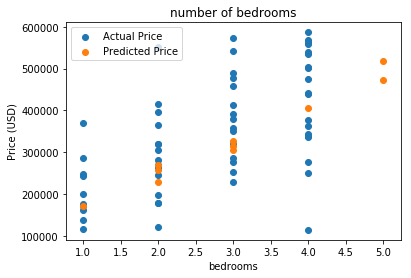

In [50]:
plt.scatter(houses.bedrooms, houses.price, label = 'Actual Price')
plt.scatter(bid.bedrooms, bid['Predicted Prices'], label = 'Predicted Price')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
sns.despine

# How about the other factors?

Let's see how we can create a linear regression model using the square feet, number of bedrooms and number of bathrooms

In [27]:
from sklearn.linear_model import LinearRegression
x = houses.drop('price', axis = 1)
lm = LinearRegression()
lm.fit(x, houses.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print('estimated intercept coefficient:', lm.intercept_)
print('number of coefficients:', len(lm.coef_))

estimated intercept coefficient: 51880.41082236136
number of coefficients: 3


In [37]:
#estimated coefficients
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['Features', 'estimated coefficients'])

,Features,estimated coefficients
0,square feet,44.720885
1,bedrooms,52613.902475
2,bathrooms,27513.475624


Therefore, the model is Y = 51880.41 + 44.72 * sq + 52613.9 * bedrooms + 27513.48 * bathrooms 

There is a high corrlation between the number of bedrooms and the price. One extra bedroom can increase the price of the house by $52,613.9